In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [3]:
#Load dataset1 into a dataframe
covid_data = pd.read_csv("C:/Users/joann/OneDrive - UTS/08 Data visualisation/Group Assignment/Data_Viz/data_viz/data/raw/COVID.csv")

In [4]:
covid_data.shape

(239, 14)

In [5]:
covid_data.columns

Index(['Country', 'Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious, Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 'Tests/1M pop',
       'Population'],
      dtype='object')

In [6]:
covid_data.dtypes

Country               object
Total Cases           object
New Cases             object
Total Deaths          object
New Deaths           float64
Total Recovered       object
New Recovered         object
Active Cases          object
Serious, Critical     object
Tot Cases/1M pop      object
Deaths/1M pop         object
Total Tests           object
Tests/1M pop          object
Population            object
dtype: object

In [7]:
covid_data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


In [8]:
# Cleaning the dataset
columns_to_clean = [
    'Total Cases', 'New Cases', 'Total Deaths', 'Total Recovered', 
    'New Recovered', 'Active Cases', 'Serious, Critical', 
    'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests', 
    'Tests/1M pop', 'Population'
]

# Remove commas and convert columns to numeric types
for col in columns_to_clean:
    covid_data[col] = covid_data[col].str.replace(',', '')  # Remove commas
    covid_data[col] = pd.to_numeric(covid_data[col], errors='coerce')  # Convert to numeric

In [9]:
# Rename the 'Country' column to 'country_name'
covid_data = covid_data.rename(columns={'Country': 'country_name'})

In [10]:
covid_data.dtypes

country_name          object
Total Cases            int64
New Cases            float64
Total Deaths         float64
New Deaths           float64
Total Recovered      float64
New Recovered        float64
Active Cases         float64
Serious, Critical    float64
Tot Cases/1M pop     float64
Deaths/1M pop        float64
Total Tests          float64
Tests/1M pop         float64
Population           float64
dtype: object

In [11]:
# Clean 'Total Cases' column (remove commas and convert to float)
covid_data['Total Cases'] = pd.to_numeric(covid_data['Total Cases'], errors='coerce')  # Convert to float with NaN for non-numeric values

In [13]:
covid_data.fillna(0, inplace=True)

In [14]:
covid_data.head()

,country_name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,111367209,0.0,1199031.0,0.0,109053249.0,0.0,1114929.0,1771.0,332633.0,3581.0,1.186743e+09,3544577.0,3.348053e+08
1,India,45028429,161.0,533475.0,2.0,0.0,0.0,0.0,0.0,32012.0,379.0,9.358795e+08,665334.0,1.406632e+09
2,France,40138560,0.0,167642.0,0.0,39970918.0,0.0,0.0,0.0,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38819284,574.0,182439.0,28.0,38240600.0,0.0,396245.0,0.0,462776.0,2175.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,38407327,0.0,709765.0,0.0,36249161.0,0.0,1448401.0,0.0,178345.0,3296.0,6.377617e+07,296146.0,2.153536e+08


In [15]:
df1 = covid_data.copy()

In [16]:
#Load dataset2 into a dataframe
vax_data = pd.read_csv("C:/Users/joann/OneDrive - UTS/08 Data visualisation/Group Assignment/Data_Viz/data_viz/data/raw/country_vaccinations_by_manufacturer.csv")

In [17]:
vax_data.shape

(35623, 4)

In [18]:
vax_data.columns

Index(['location', 'date', 'vaccine', 'total_vaccinations'], dtype='object')

In [19]:
vax_data.dtypes

location              object
date                  object
vaccine               object
total_vaccinations     int64
dtype: object

In [20]:
vax_data.head()

,location,date,vaccine,total_vaccinations
0,Argentina,29/12/2020,Moderna,2
1,Argentina,Soc,Oxford/AstraZeneca,3
2,Argentina,29/12/2020,Sinopharm/Beijing,1
3,Argentina,29/12/2020,Sputnik V,20481
4,Argentina,30/12/2020,Moderna,2


In [21]:
vax_data['date'] = pd.to_datetime(vax_data['date'], errors='coerce', dayfirst=True)

In [22]:
# Extract year from 'date' column and place it in a new column 'year'
vax_data['year'] = vax_data['date'].dt.year

In [23]:
# Rename the 'Country' column to 'country_name'
vax_data = vax_data.rename(columns={'location': 'country_name'})

In [36]:
vax_data.fillna(0, inplace=True)

In [37]:
df2 = vax_data.copy()

In [25]:
#Load dataset3 into a dataframe
expectancy_data = pd.read_csv("C:/Users/joann/OneDrive - UTS/08 Data visualisation/Group Assignment/Data_Viz/data_viz/data/raw/life expectancy.csv")

In [26]:
expectancy_data.shape

(174, 16)

In [27]:
expectancy_data.columns

Index(['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [28]:
expectancy_data.dtypes

Country Name                       object
Country Code                       object
Region                             object
IncomeGroup                        object
Year                                int64
Life Expectancy World Bank        float64
Prevelance of Undernourishment    float64
CO2                               float64
Health Expenditure %              float64
Education Expenditure %           float64
Unemployment                      float64
Corruption                        float64
Sanitation                        float64
Injuries                          float64
Communicable                      float64
NonCommunicable                   float64
dtype: object

In [29]:
expectancy_data.head()

,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2019,64.833,26.9,6079.999924,13.242202,3.213780,11.217,2.0,NaN,3481166.42,6034434.86,7601757.82
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2019,61.147,17.9,25209.999080,2.533360,1.927457,7.421,NaN,NaN,1168866.00,7237433.13,4176568.27
2,Albania,ALB,Europe & Central Asia,Upper middle income,2019,78.573,4.3,4829.999924,NaN,3.916650,11.470,NaN,47.577141,82288.10,51797.42,631629.88
3,Andorra,AND,Europe & Central Asia,High income,2019,NaN,NaN,500.000000,6.711585,3.150610,NaN,NaN,100.000004,2124.01,800.50,19002.03
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2019,77.972,6.0,188860.000600,4.275049,3.867370,2.230,NaN,99.147700,382562.41,120204.51,1637717.40


In [30]:
expectancy_data.fillna(0, inplace=True)

In [31]:
# Rename the 'Country' column to 'country_name'
expectancy_data = expectancy_data.rename(columns={'Country Name': 'country_name'})

In [32]:
df3 = expectancy_data.copy()

In [33]:
df1.head()

,country_name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,111367209,0.0,1199031.0,0.0,109053249.0,0.0,1114929.0,1771.0,332633.0,3581.0,1.186743e+09,3544577.0,3.348053e+08
1,India,45028429,161.0,533475.0,2.0,0.0,0.0,0.0,0.0,32012.0,379.0,9.358795e+08,665334.0,1.406632e+09
2,France,40138560,0.0,167642.0,0.0,39970918.0,0.0,0.0,0.0,612013.0,2556.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38819284,574.0,182439.0,28.0,38240600.0,0.0,396245.0,0.0,462776.0,2175.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,38407327,0.0,709765.0,0.0,36249161.0,0.0,1448401.0,0.0,178345.0,3296.0,6.377617e+07,296146.0,2.153536e+08


In [38]:
df2.head()

,country_name,date,vaccine,total_vaccinations,year
0,Argentina,2020-12-29 00:00:00,Moderna,2,2020.0
1,Argentina,0,Oxford/AstraZeneca,3,0.0
2,Argentina,2020-12-29 00:00:00,Sinopharm/Beijing,1,2020.0
3,Argentina,2020-12-29 00:00:00,Sputnik V,20481,2020.0
4,Argentina,2020-12-30 00:00:00,Moderna,2,2020.0


In [39]:
df3.head()

,country_name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,Afghanistan,AFG,South Asia,Low income,2019,64.833,26.9,6079.999924,13.242202,3.213780,11.217,2.0,0.000000,3481166.42,6034434.86,7601757.82
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2019,61.147,17.9,25209.999080,2.533360,1.927457,7.421,0.0,0.000000,1168866.00,7237433.13,4176568.27
2,Albania,ALB,Europe & Central Asia,Upper middle income,2019,78.573,4.3,4829.999924,0.000000,3.916650,11.470,0.0,47.577141,82288.10,51797.42,631629.88
3,Andorra,AND,Europe & Central Asia,High income,2019,0.000,0.0,500.000000,6.711585,3.150610,0.000,0.0,100.000004,2124.01,800.50,19002.03
4,United Arab Emirates,ARE,Middle East & North Africa,High income,2019,77.972,6.0,188860.000600,4.275049,3.867370,2.230,0.0,99.147700,382562.41,120204.51,1637717.40


In [40]:
merged_df = pd.merge(df1, df2, on='country_name')

In [41]:
merged_df.shape

(28324, 18)

In [42]:
df = pd.merge(merged_df, df3, on='country_name')

In [43]:
df.shape

(25456, 33)

In [44]:
df.columns

Index(['country_name', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious, Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population', 'date', 'vaccine', 'total_vaccinations',
       'year', 'Country Code', 'Region', 'IncomeGroup', 'Year',
       'Life Expectancy World Bank', 'Prevelance of Undernourishment', 'CO2',
       'Health Expenditure %', 'Education Expenditure %', 'Unemployment',
       'Corruption', 'Sanitation', 'Injuries', 'Communicable',
       'NonCommunicable'],
      dtype='object')

In [72]:
selected_columns = [
    'Region',
    'country_name', 
    'date', 
    'Total Cases', 
    'Total Deaths', 
    'Deaths/1M pop', 
    'Total Tests', 
    'total_vaccinations', 
    'Population', 
    'IncomeGroup', 
    'Life Expectancy World Bank'
]

In [73]:
# Create a new dataframe with selected columns
new_df = df[selected_columns].copy()

In [74]:
new_df.head()

,Region,country_name,date,Total Cases,Total Deaths,Deaths/1M pop,Total Tests,total_vaccinations,Population,IncomeGroup,Life Expectancy World Bank
0,Europe & Central Asia,France,2020-12-27 00:00:00,40138560,167642.0,2556.0,271490188.0,593,65584518.0,High income,82.826829
1,Europe & Central Asia,France,2020-12-28 00:00:00,40138560,167642.0,2556.0,271490188.0,1242,65584518.0,High income,82.826829
2,Europe & Central Asia,France,2020-12-29 00:00:00,40138560,167642.0,2556.0,271490188.0,1610,65584518.0,High income,82.826829
3,Europe & Central Asia,France,2020-12-30 00:00:00,40138560,167642.0,2556.0,271490188.0,2043,65584518.0,High income,82.826829
4,Europe & Central Asia,France,2020-12-31 00:00:00,40138560,167642.0,2556.0,271490188.0,2403,65584518.0,High income,82.826829


In [75]:
new_df.columns

Index(['Region', 'country_name', 'date', 'Total Cases', 'Total Deaths',
       'Deaths/1M pop', 'Total Tests', 'total_vaccinations', 'Population',
       'IncomeGroup', 'Life Expectancy World Bank'],
      dtype='object')

# *ANALYSIS*

In [76]:
# Calculate mortality rate (%)
new_df['Mortality Rate (%)'] = (new_df['Total Deaths'] / new_df['Total Cases']) * 100

# Calculate testing rate (tests per capita)
new_df['Testing Rate'] = new_df['Total Tests'] / new_df['Population']

# Calculate vaccination rate (%)
new_df['Vaccination Rate (%)'] = (new_df['total_vaccinations'] / new_df['Population']) * 100

# Group data by country for analysis
grouped_data = new_df.groupby('Region')

## *VISUALISATION*

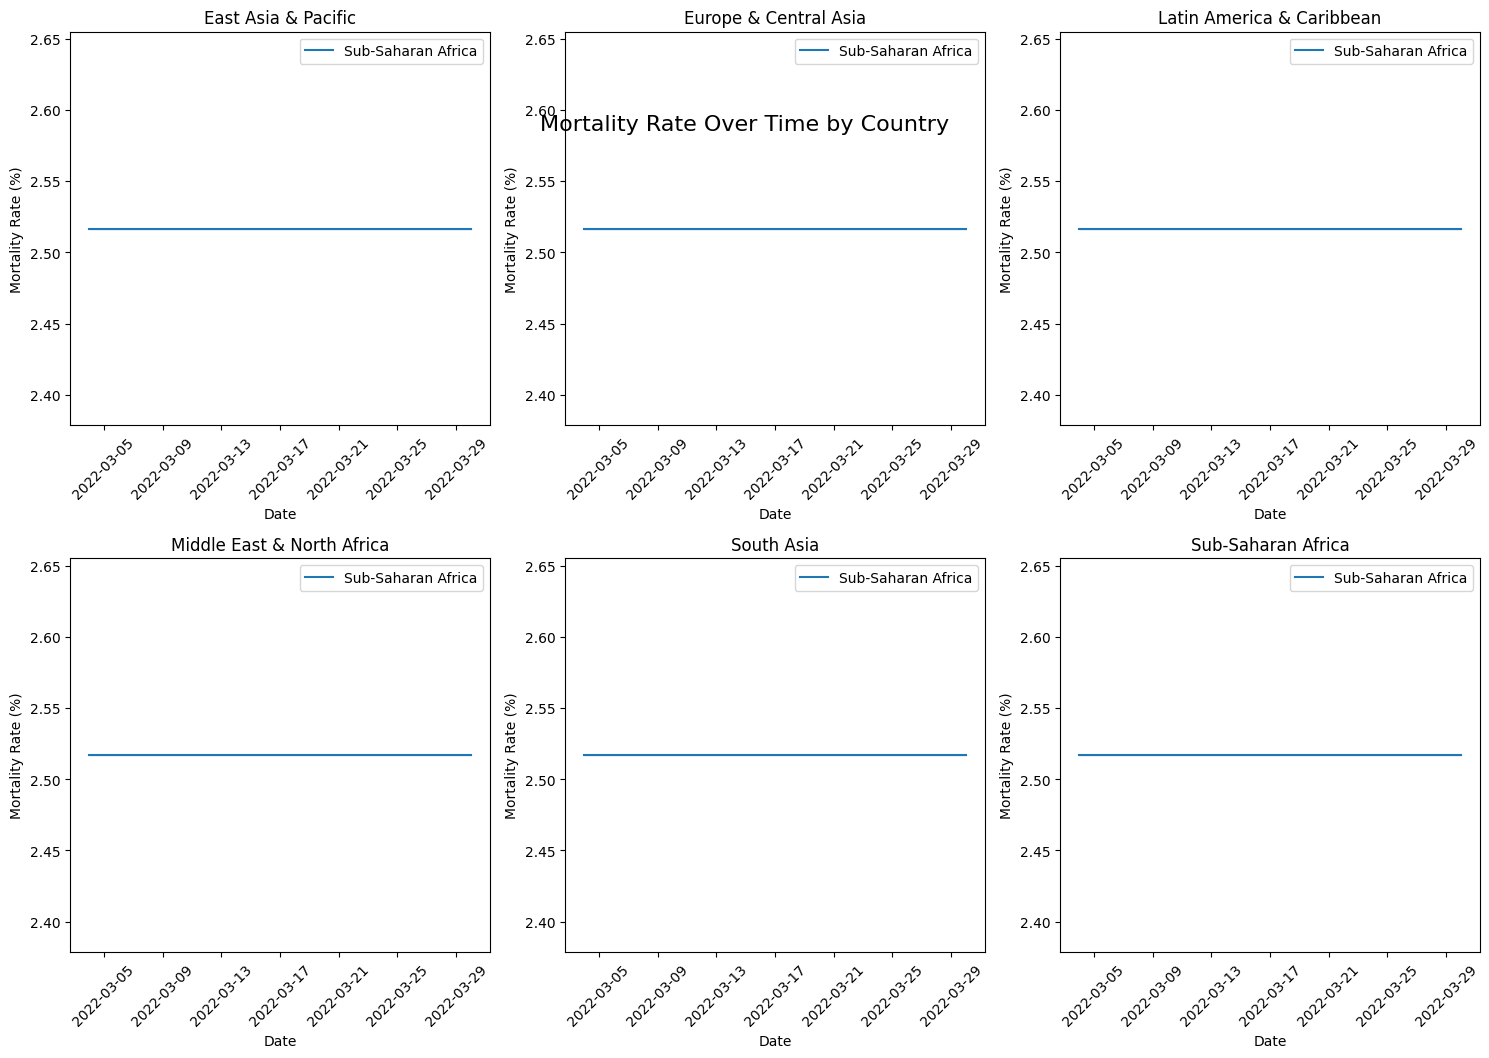

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure with subplots for each country
plt.figure(figsize=(15, 15))
sns.set_palette("tab10")  # Use a different color palette for each country

# Iterate over each country and plot mortality rate over time
for i, country in enumerate(grouped_data.groups.keys(), 1):
    plt.subplot(len(grouped_data.groups) // 3 + 1, 3, i)  # Create subplots in a grid layout
    region_data = grouped_data.get_group(region)  # Get data for the region
    sns.lineplot(x='date', y='Mortality Rate (%)', data=region_data, label=region)
    plt.title(country)
    plt.xlabel('Date')
    plt.ylabel('Mortality Rate (%)')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust subplot spacing

plt.suptitle('Mortality Rate Over Time by Country', y=0.92, fontsize=16)
plt.show()

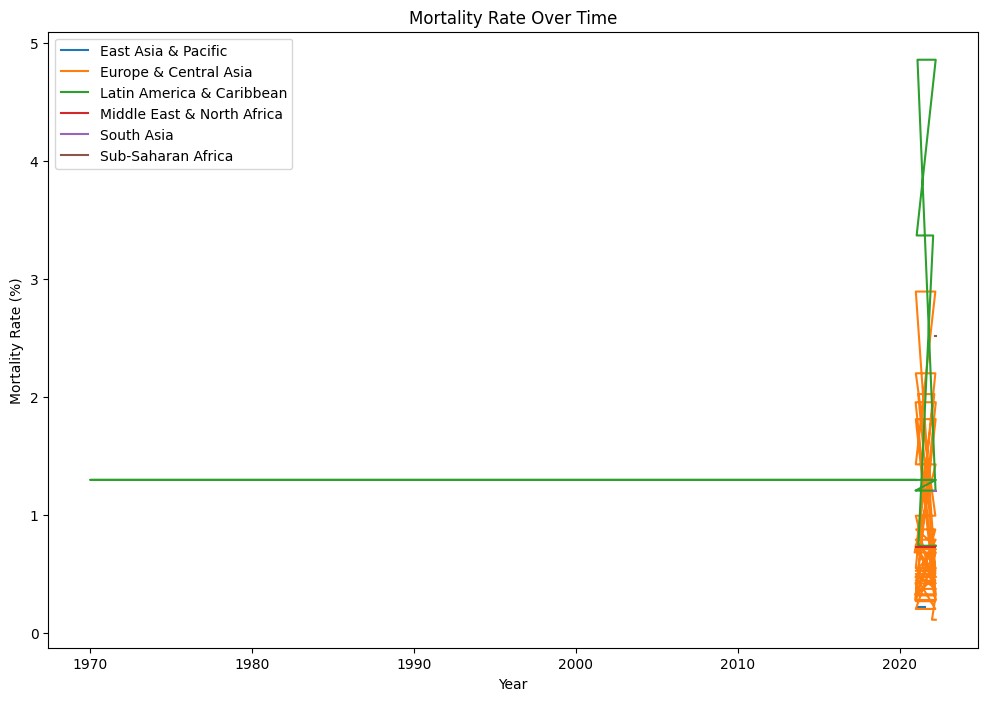

In [79]:
# Plotting the trends over time for each country
plt.figure(figsize=(12, 8))

for region, group in grouped_data:
    plt.plot(group['date'], group['Mortality Rate (%)'], label=region)

plt.xlabel('Year')
plt.ylabel('Mortality Rate (%)')
plt.title('Mortality Rate Over Time')
plt.legend()
plt.show()

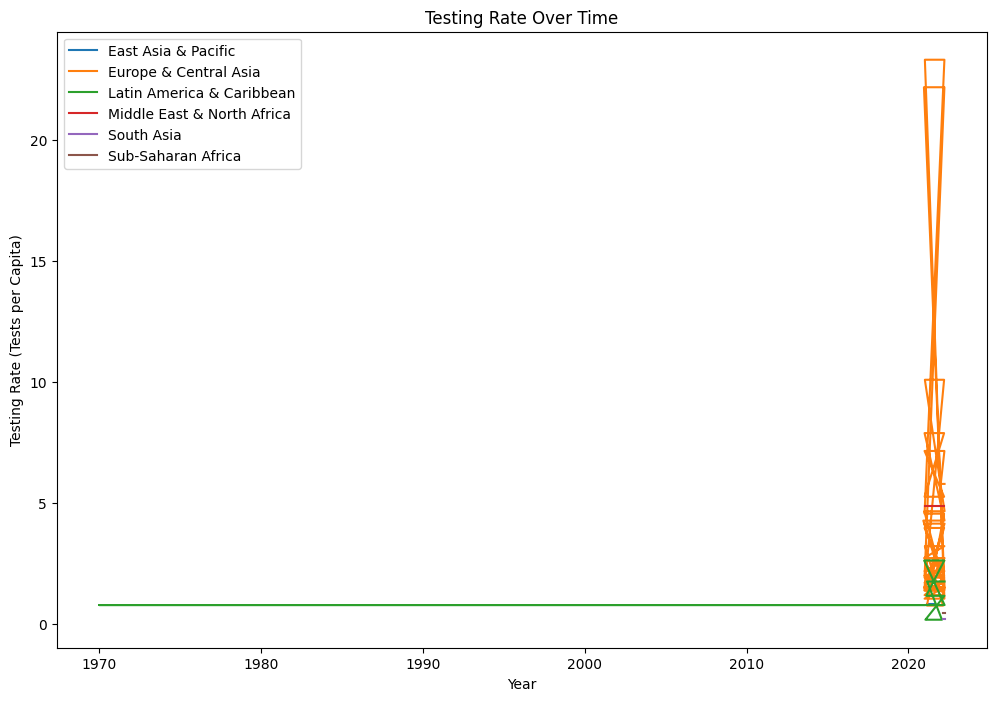

In [80]:
plt.figure(figsize=(12, 8))

for region, group in grouped_data:
    plt.plot(group['date'], group['Testing Rate'], label=region)

plt.xlabel('Year')
plt.ylabel('Testing Rate (Tests per Capita)')
plt.title('Testing Rate Over Time')
plt.legend()
plt.show()

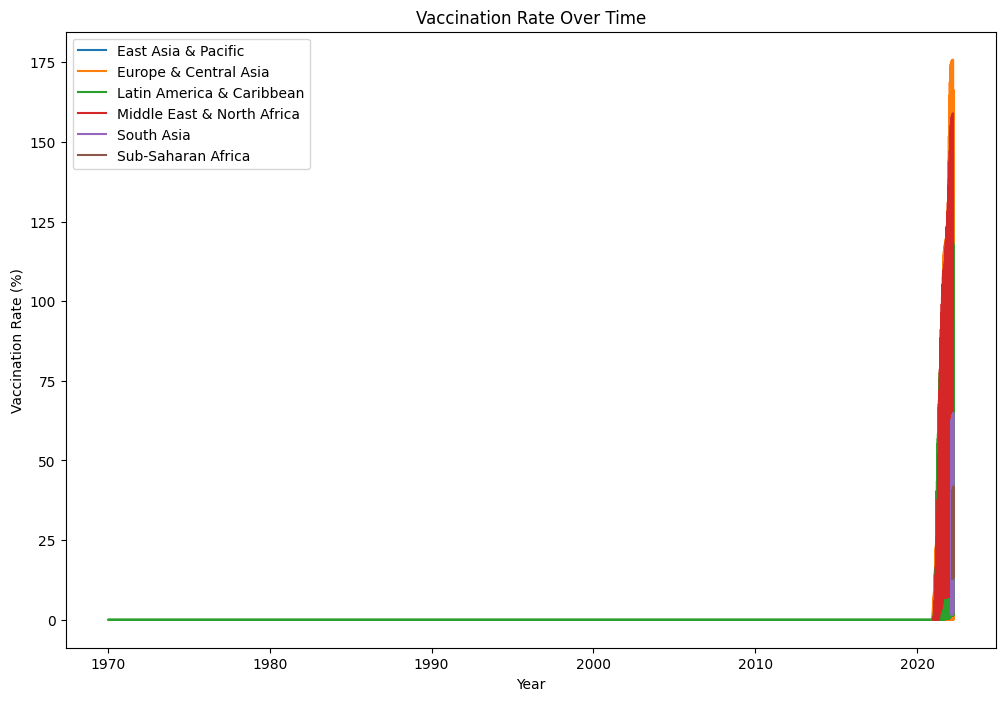

In [81]:
plt.figure(figsize=(12, 8))

for region, group in grouped_data:
    plt.plot(group['date'], group['Vaccination Rate (%)'], label=region)

plt.xlabel('Year')
plt.ylabel('Vaccination Rate (%)')
plt.title('Vaccination Rate Over Time')
plt.legend()
plt.show()

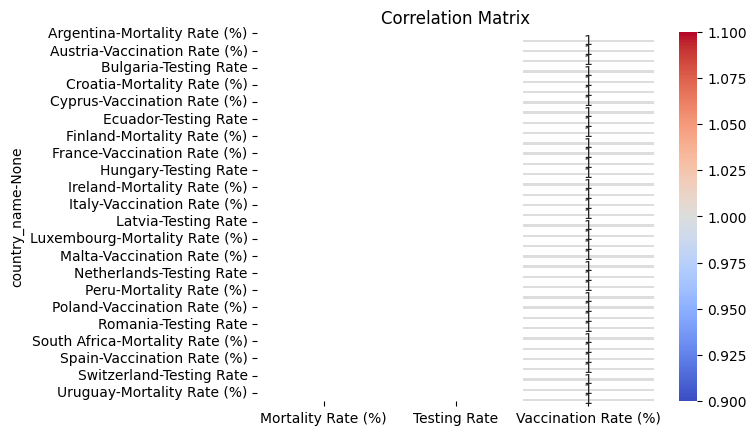

In [66]:
correlation_matrix = grouped_data[['Mortality Rate (%)', 'Testing Rate', 'Vaccination Rate (%)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()